In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [4]:
series.shape

(36,)

In [5]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

In [7]:
arima_init = ARIMA(series, order=(5,1,0))
arima_model = arima_init.fit(disp=0)


print(arima_model.summary())

C:\Users\DELLPC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DELLPC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DELLPC\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\DELLPC\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this w

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Wed, 17 Apr 2019   AIC                            406.340
Time:                                                 18:34:34   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

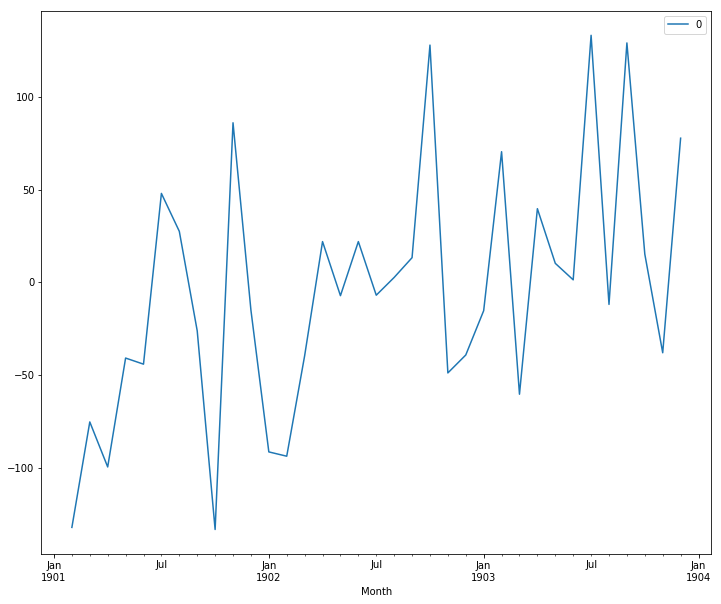

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
residuals = pd.DataFrame(arima_model.resid)
residuals.plot(figsize=(12,10))
plt.show()

In [14]:
X = series.values
size = int(len(X) * 0.66)

In [15]:
# Split train and test data into 66% training data and 33% test data
X_train, X_test = X[0:size], X[size:len(X)]

In [16]:
# Create a history object with all the train data and appending new data to it
hist_obj = [x for x in X_train]

In [17]:
# Create an empty list for all the predictions done
pred = []
for j in range(len(X_test)):
    arima_init = ARIMA(hist_obj, order=(5,1,0))
    arima_model = arima_init.fit(disp=0)
    output = arima_model.forecast()
    y_new = output[0]
    pred.append(y_new)
    new = X_test[j]
    hist_obj.append(new)
    print('predicted=%f, Expected=%f' % (y_new, new))

C:\Users\DELLPC\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\DELLPC\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\DELLPC\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an a

predicted=349.117556, Expected=342.300000
predicted=306.512948, Expected=339.700000
predicted=387.376446, Expected=440.400000
predicted=348.154141, Expected=315.900000
predicted=386.308803, Expected=439.300000
predicted=356.082046, Expected=401.300000
predicted=446.379461, Expected=437.400000
predicted=394.737311, Expected=575.500000
predicted=434.915513, Expected=407.600000
predicted=507.923346, Expected=682.000000
predicted=435.482809, Expected=475.300000
predicted=652.743808, Expected=581.300000
predicted=546.343467, Expected=646.900000


In [18]:
# Mean squared error and the plotted graph
mean_squared_error(X_test,pred)

6958.327595901934

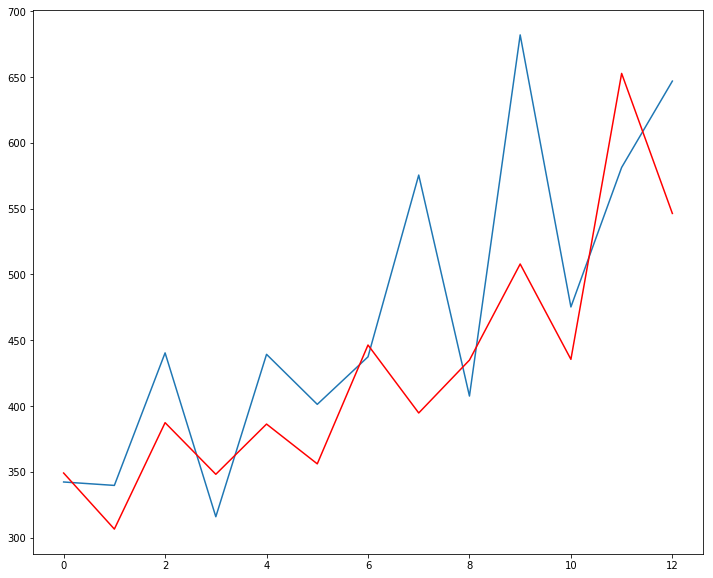

In [21]:
plt.figure(figsize=(12,10))
plt.plot(X_test)
plt.plot(pred, color='red')